 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
path = Path('./Resources/whale_returns.csv') # Set the path
whale_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
whale_df.head() #Preview

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_df.isna().sum()) # Count the number of nulls and sum them all up

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_df.dropna(inplace = True) # Drop Nulls
whale_df.head() # Preview

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
path = Path('./Resources/algo_returns.csv') # Set the path
algo_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
algo_df.head() #Preview

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
print(algo_df.isna().sum()) # Count the number of nulls and sum them all up

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_df.dropna(inplace = True) # Drop Nulls
algo_df.head() # Preview

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [44]:
# Reading S&P 500 Closing Prices
path = Path('./Resources/sp500_history.csv') # Set the path
sp500_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
sp500_df.head() #Preview

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].astype(str).str.replace('$', '').astype(float) # Take the close column, cast it to a string, remove the '$', then cast that as a float
sp500_df.head() # Preview

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change() # Takes the percent change from the day before, updates the same dataframe because we don't use prices anywhere else

In [12]:
# Drop nulls
sp500_df.dropna(inplace = True) # Drops nulls inplace
sp500_df.head() # Preview

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns = {'Close':'S&P 500'}, inplace = True) # Renames inplace
sp500_df.head() # Preview

,S&P 500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df,algo_df,sp500_df], axis = 'columns', join = 'inner') # Joins the columns with an inner join
joined_df.head() # Preview

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

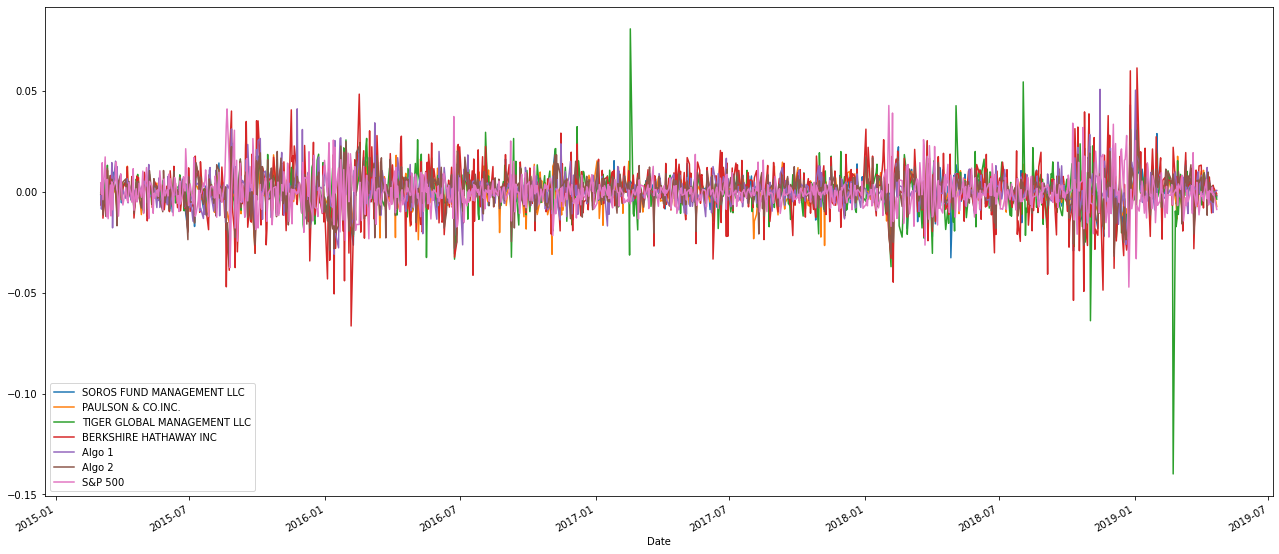

In [15]:
# Plot daily returns of all portfolios
joined_df.plot(figsize=(22,10)) # Figsize set for my computer screen

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

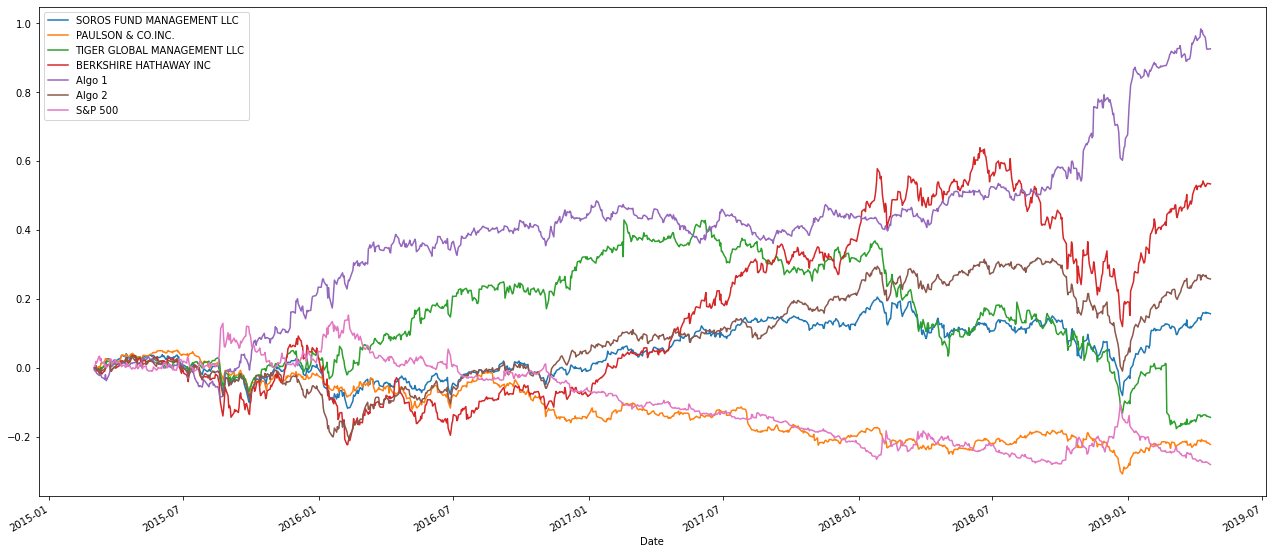

In [16]:
# Calculate cumulative returns of all portfolios
cum_ret = (1 + joined_df).cumprod() - 1 # Generates cumulative returns
# Plot cumulative returns
cum_ret.plot(figsize=(22,10)) # Figsize set for my computer screen

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

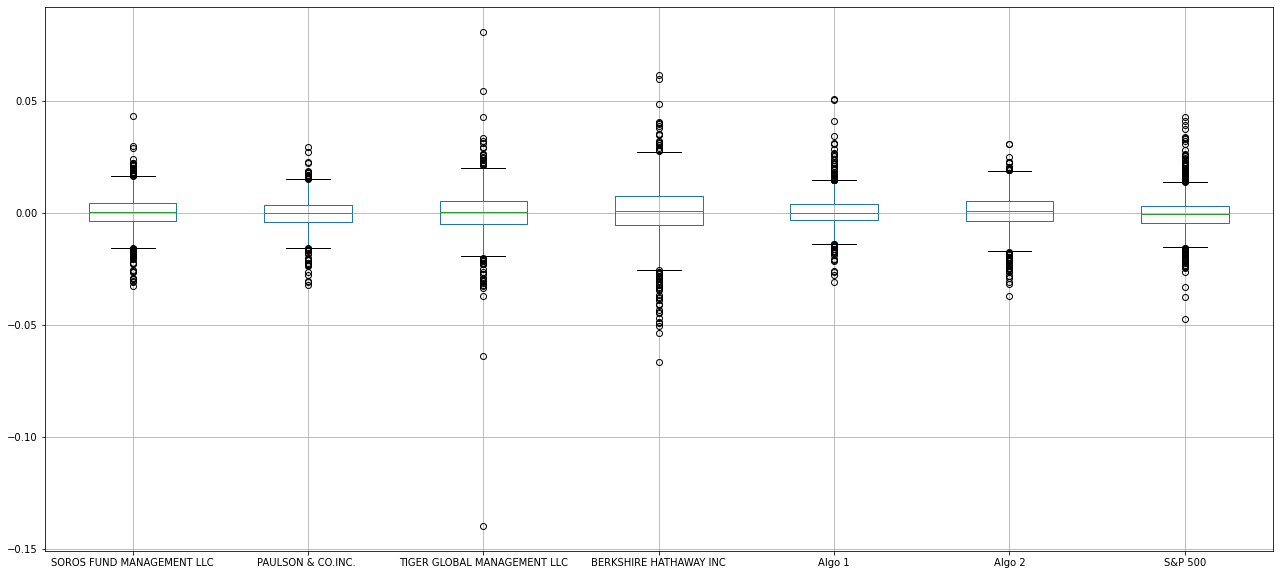

In [17]:
# Box plot to visually show risk
joined_df.boxplot(figsize=(22,10)) # Figsize set for my computer screen

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
joined_df.std() # Generates the standard deviations for all portfolios

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
print(joined_df.std()['S&P 500']) #Prints out the standard deviation for S&P
# Determine which portfolios are riskier than the S&P 500
list(joined_df.std()[joined_df.std() > joined_df.std()['S&P 500']].index) # Generates a list of indicies from the Standard Deviation series
# where the standard deviation is higher than that of the S&P 500

0.00858688974707399


['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility = joined_df.std() * np.sqrt(252)
print(volatility) # Prints out the annualized standard deviation for all trading days, assuming 252 in a year

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

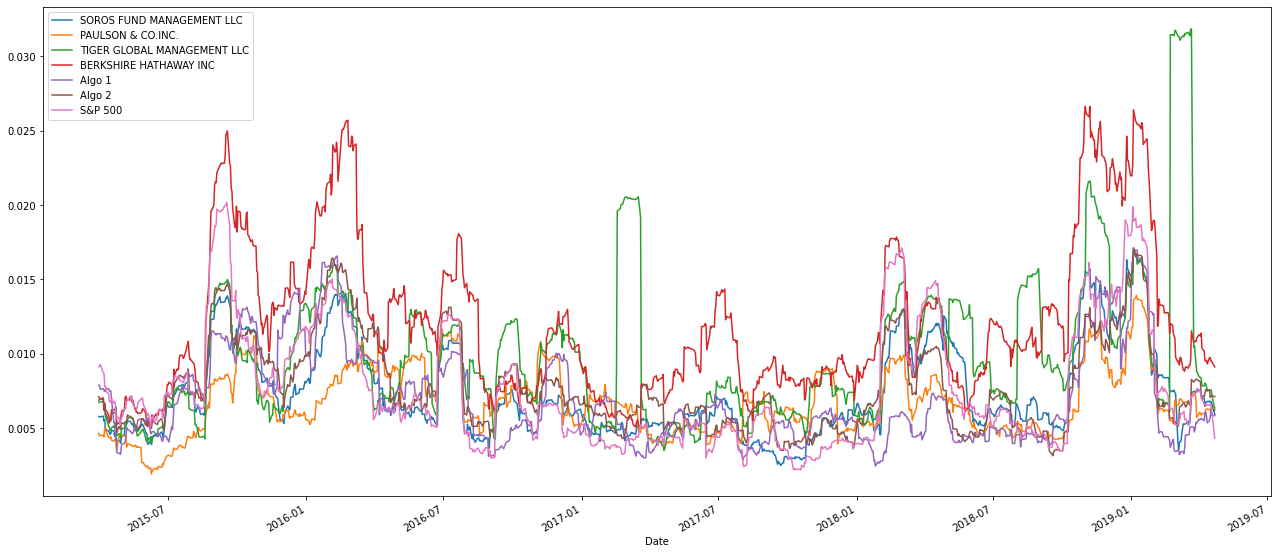

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std_dev = joined_df.rolling(21).std()
# Plot the rolling standard deviation
roll_std_dev.plot(figsize=(22,10)) # Figsize set for my computer screen

### Calculate and plot the correlation

<AxesSubplot:>

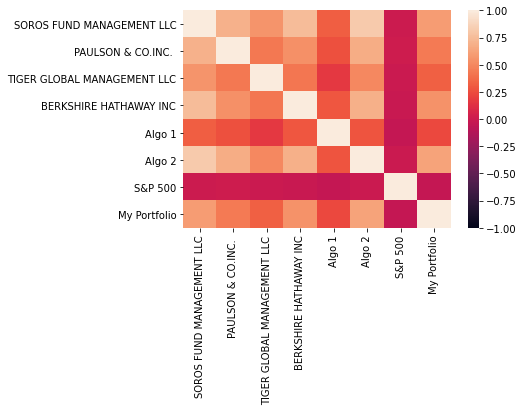

In [48]:
# Calculate the correlation
correlation = joined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1) #Generates a heatmap of correlation data. I have checked and checked but it seems really odd to me that nothing has a correlation with the S&P 500

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

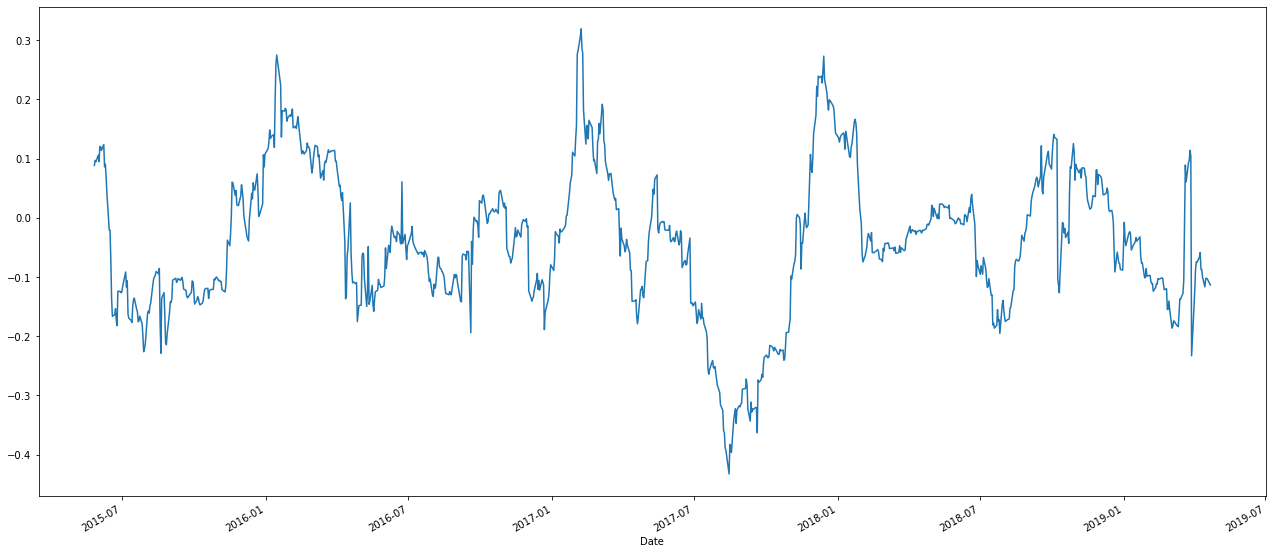

In [23]:
# Calculate covariance of a single portfolio
covariance = joined_df['Algo 1'].rolling(60).cov(joined_df['S&P 500'])
# Calculate variance of S&P 500
variance = joined_df['S&P 500'].rolling(60).var()
# Computing beta
beta = covariance/variance
# Plot beta trend
beta.plot(figsize=(22,10))  # Figsize set for my computer screen

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

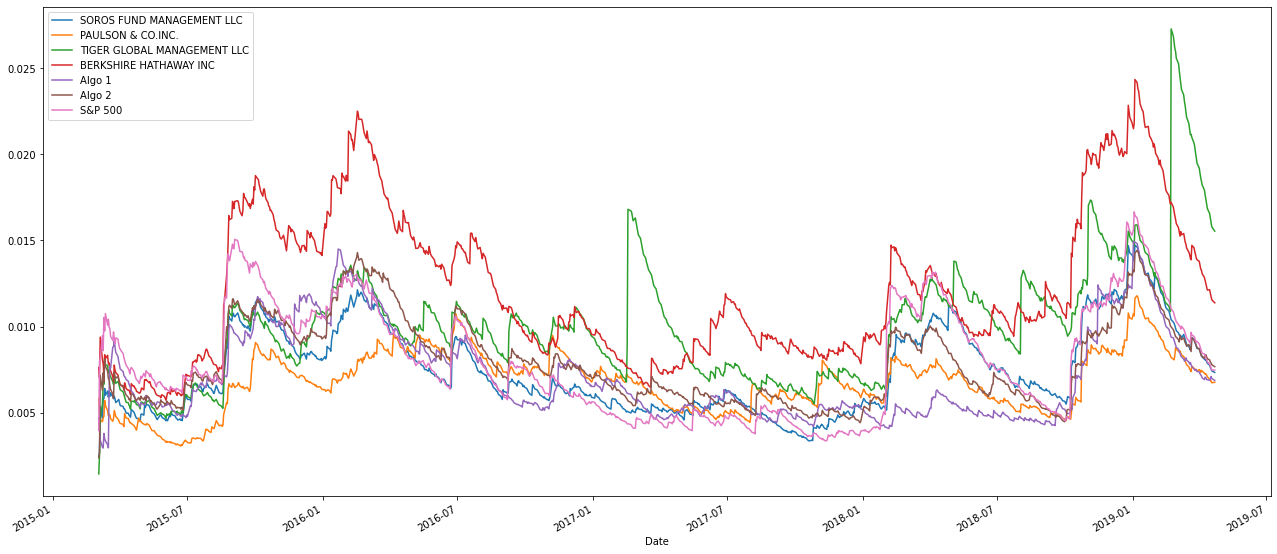

In [24]:
# Use `ewm` to calculate the rolling window
joined_df.ewm(halflife=21).std().plot(figsize=(22,10))  # Figsize set for my computer screen

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sr = joined_df.mean()/joined_df.std() * np.sqrt(252)

<AxesSubplot:>

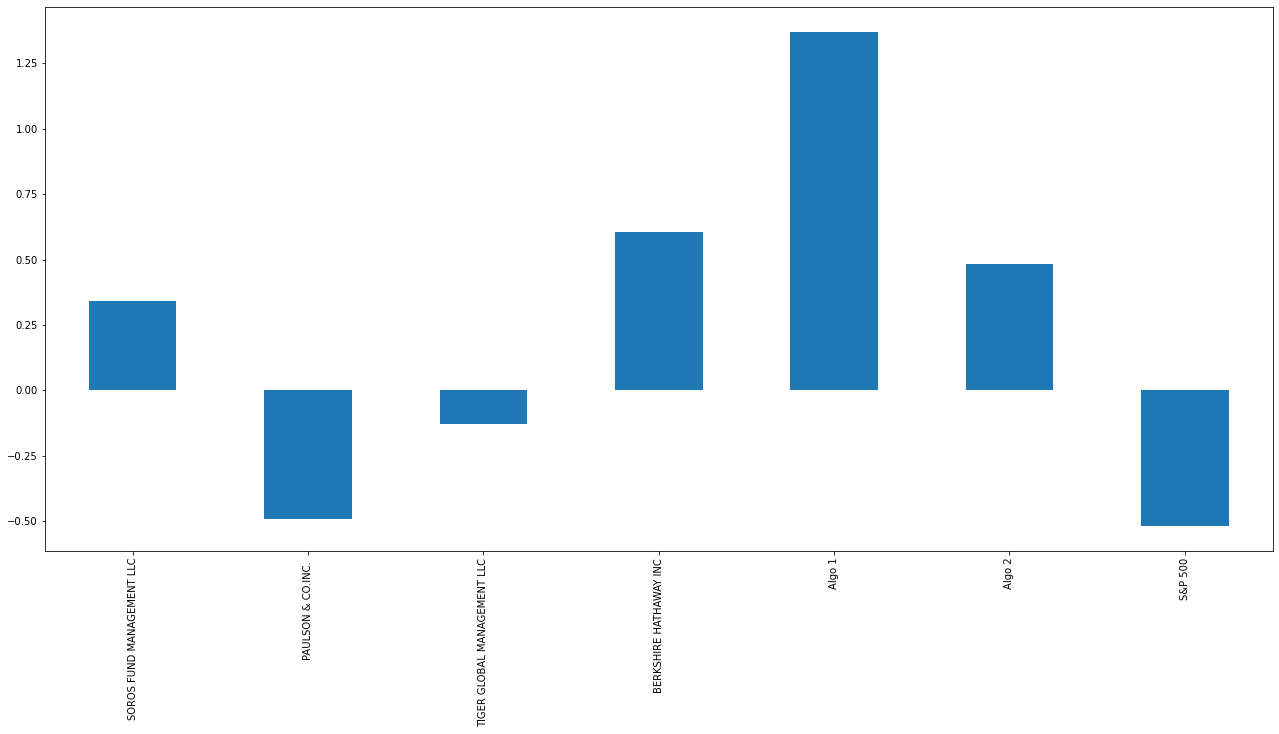

In [26]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind = 'bar', figsize=(22,10))  # Figsize set for my computer screen

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both algorithmic strategies outperform the market because they have higher cumulative returns and larger Sharpe ratios (better Return:Risk ratio)

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
path = Path('./Resources/ajrd_data.csv') # Set the path
ajrd_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
ajrd_df.rename(columns = {'Close':'AJRD'}, inplace = True) #Chose Aerojet Rocketdyne as a Stock
ajrd_df.head() #Preview

,AJRD
Date,
2015-01-02,18.15
2015-01-05,17.92
2015-01-06,17.51
2015-01-07,17.21
2015-01-08,17.29


In [28]:
# Reading data from 2nd stock
path = Path('./Resources/bb_data.csv') # Set the path
bb_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
bb_df.rename(columns = {'Close':'BB'}, inplace = True) #Chose Blackberry as a Stock
bb_df.head() #Preview

,BB
Date,
2015-01-02,10.82
2015-01-05,10.76
2015-01-06,10.62
2015-01-07,10.67
2015-01-08,10.63


In [29]:
# Reading data from 3rd stock
path = Path('./Resources/nok_data.csv') # Set the path
nok_df = pd.read_csv(path, index_col='Date', parse_dates=True, infer_datetime_format=True) #Read the csv file from the path into a dataframe, with dates as indicies
nok_df.rename(columns = {'Close':'NOK'}, inplace = True) #Chose Nokia as a Stock
nok_df.head() # Preview

,NOK
Date,
2015-01-02,8.01
2015-01-05,7.66
2015-01-06,7.54
2015-01-07,7.56
2015-01-08,7.60


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([ajrd_df,bb_df,nok_df], axis = 'columns', join = 'inner') # Joins columns together with an inner join
combined_df.head() # Preview

,AJRD,BB,NOK
Date,,,
2015-01-02,18.15,10.82,8.01
2015-01-05,17.92,10.76,7.66
2015-01-06,17.51,10.62,7.54
2015-01-07,17.21,10.67,7.56
2015-01-08,17.29,10.63,7.60


In [31]:
# Reset Date index

# *****I already set date as index on import

In [32]:
# Reorganize portfolio data by having a column per symbol

# *****Already done when I renamed the columns and concatenated them

In [33]:
# Calculate daily returns
daily_returns = combined_df.pct_change() # Takes the percentage difference from the row before
# Drop NAs
daily_returns.dropna(inplace = True) # Drops nulls inplace
# Display sample data
daily_returns.head() # Preview

,AJRD,BB,NOK
Date,,,
2015-01-05,-0.012672,-0.005545,-0.043695
2015-01-06,-0.022879,-0.013011,-0.015666
2015-01-07,-0.017133,0.004708,0.002653
2015-01-08,0.004648,-0.003749,0.005291
2015-01-09,0.003470,-0.023518,-0.006579


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3] # Default weights given

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights) # Dot Product

# Display sample data
portfolio_returns.head() # Preview

Date
2019-04-24   -0.006899
2019-04-25   -0.026902
2019-04-26    0.014946
2019-04-29    0.004545
2019-04-30   -0.004074
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
joined_df['My Portfolio'] = portfolio_returns # Adds my portfolio returns to the larger list of returns

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna(inplace = True) # Drops nulls in place
# Display sample data
joined_df.head() # Preview

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.024023
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.003770
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003229
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001508
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001086


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
volatility = joined_df.std() * np.sqrt(252) # Assumes 252 trading days in a year

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

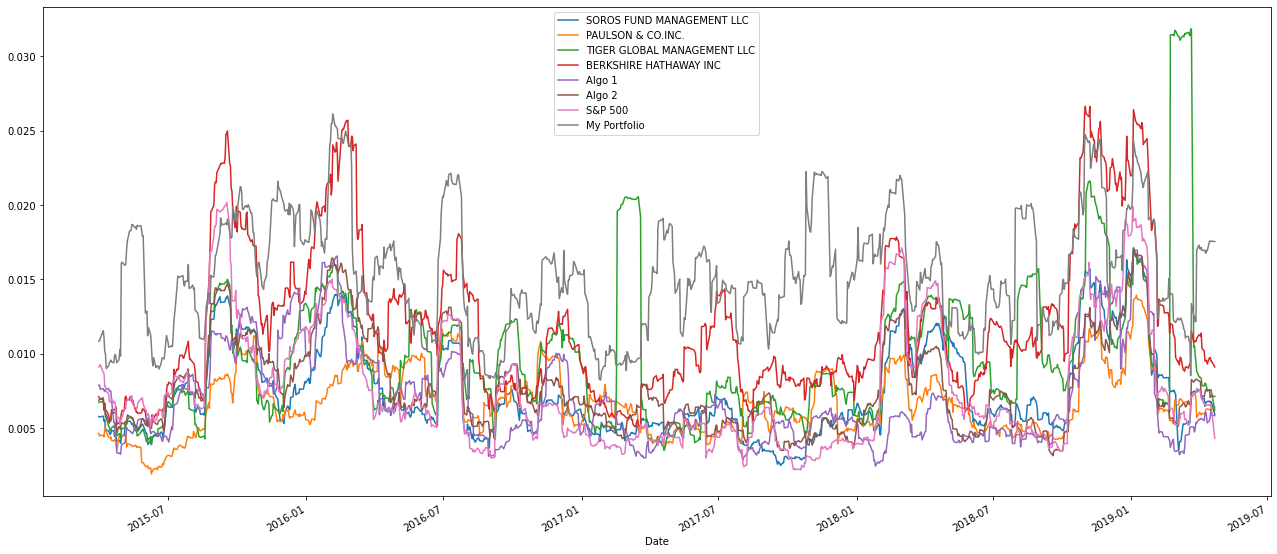

In [38]:
# Calculate rolling standard deviation
roll_std_dev = joined_df.rolling(21).std()
# Plot the rolling standard deviation
roll_std_dev.plot(figsize=(22,10))  # Figsize set for my computer screen

### Calculate and plot the correlation

<AxesSubplot:>

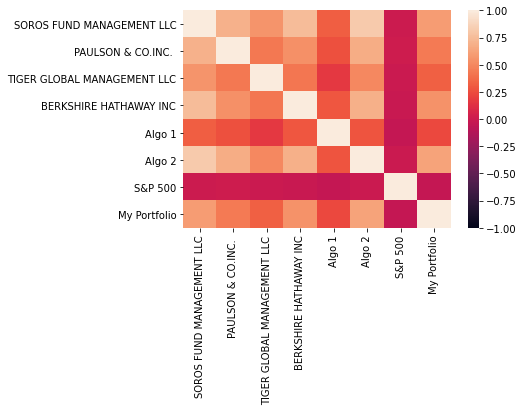

In [39]:
# Calculate and plot the correlation
correlation = joined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1) #Generates a heatmap of correlation data. I have checked and checked but it seems really odd to me that nothing has a correlation with the S&P 500

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

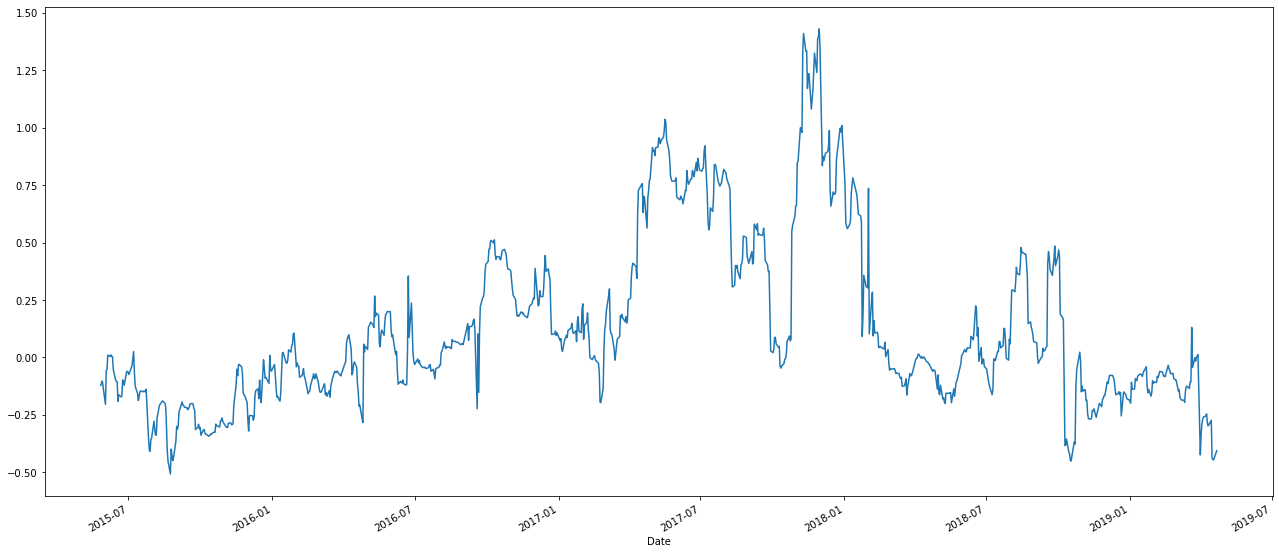

In [40]:
# Calculate and plot Beta
covariance = joined_df['My Portfolio'].rolling(60).cov(joined_df['S&P 500'])
variance = joined_df['S&P 500'].rolling(60).var()
beta = covariance/variance
beta.plot(figsize=(22,10))  # Figsize set for my computer screen

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
sr = joined_df.mean()/joined_df.std() * np.sqrt(252) # Assumes 252 trading days in a year
sr # Preview

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
My Portfolio                   0.254764
dtype: float64

<AxesSubplot:>

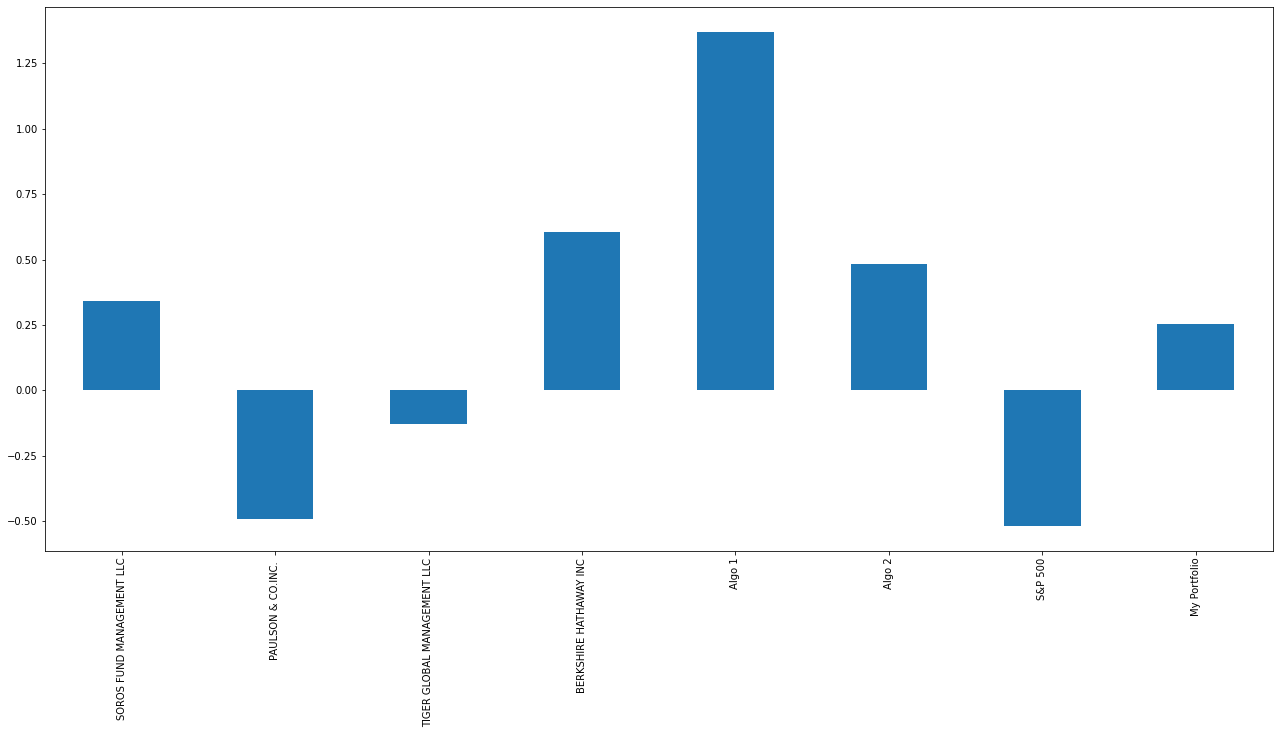

In [42]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind = 'bar',figsize=(22,10)) # Figsize set for my computer screen

### How does your portfolio do?

My Portfolio of NOK, BB, and AJRD had cumulative returns and a Sharpe ratio that outperformed the S&P 500, Paulson, and Tiger.

<AxesSubplot:xlabel='Date'>

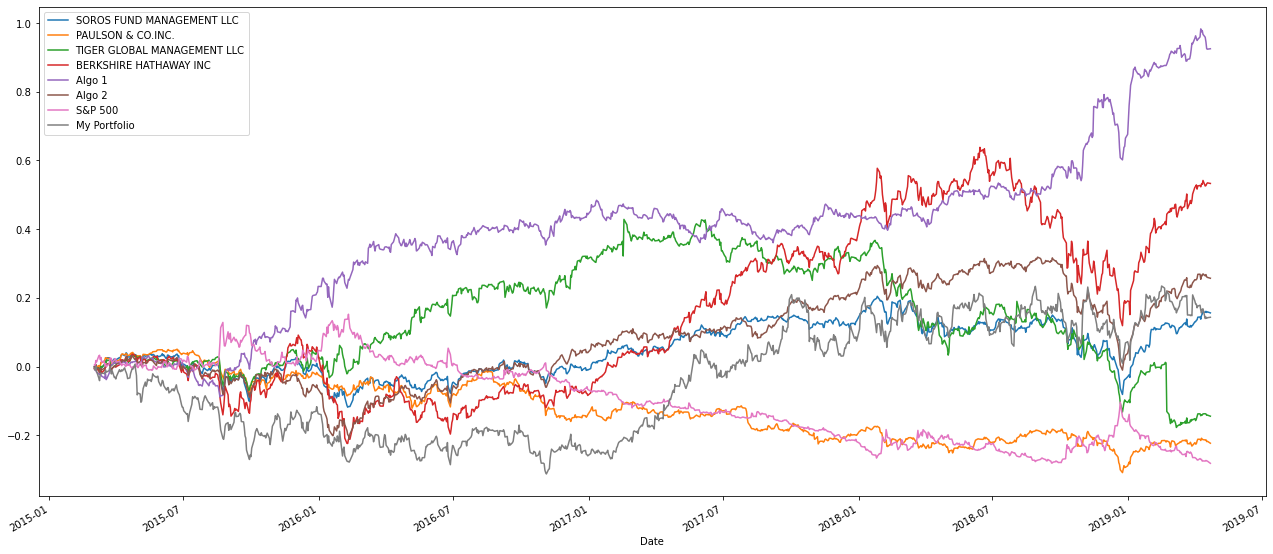

In [43]:
# Calculate cumulative returns of all portfolios
cum_ret = (1 + joined_df).cumprod() - 1
# Plot cumulative returns
cum_ret.plot(figsize=(22,10)) # Figsize set for my computer screen